In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("sales_data_sample.csv", encoding="latin")

In [7]:
# df.head()

In [8]:
# df.info()

In [9]:
df = df[['ORDERLINENUMBER', 'SALES']]

In [10]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df.values)

In [11]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit_predict(scaled_values)
    wcss.append(model.inertia_)

In [12]:
model = KMeans(n_clusters=7, init='k-means++')
clusters = model.fit_predict(scaled_values)
clusters

array([4, 4, 0, ..., 2, 4, 6], dtype=int32)

In [13]:
df['cluster'] = clusters

In [14]:
# df

In [15]:
model.inertia_

993.423684904176

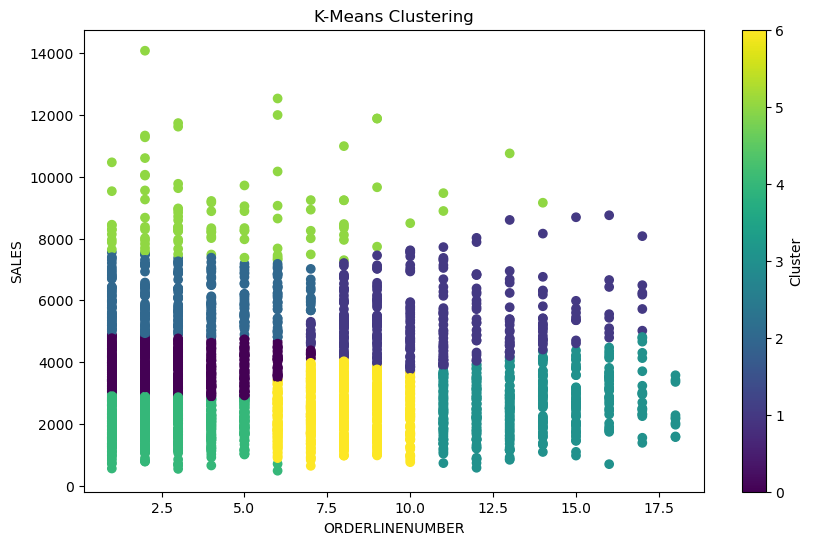

In [17]:
# Scatter plot with cluster colors
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['ORDERLINENUMBER'], df['SALES'], c=df['cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('ORDERLINENUMBER')
plt.ylabel('SALES')
plt.colorbar(label='Cluster')
plt.show()

